# Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

Integrantes del grupo:
- OSCAR EDUARDO AVILA BERNAL
- OSCAR IVAN BAUTISTA SANTANA
- JORGE ALEJANDRO HURTADO RAMIREZ
- JOSE DARIO NAVAS TORRES
- JUAN DAVID ORTEGA MURCIA
- NICOLAS ESTEBAN ROMERO VARGAS

Descripción del problema:

El propósito de este ejercicio busca emplear una base de datos para evaluar la calidad de los automóviles basándose en sus características. Utilizando un conjunto de datos predefinido para desarrollar modelos predictivos que clasifiquen los automóviles según su calidad. Esto puede ser útil en varios contextos, como la compra y venta de vehículos, la gestión de flotas de transporte o la evaluación de seguridad vial.

La Base de Datos de Evaluación de Automóviles (car.data), donada el 31/05/1997, se deriva de un modelo de decisión jerárquico simple y puede ser útil para probar métodos de inducción constructiva y descubrimiento de estructuras. Con características multivariables se adapta principalmente a tareas de clasificación. Consta de 1728 instancias y 6 características, incluyendo 'buying' (precio de compra), 'maint' (costo de mantenimiento), 'doors' (número de puertas), 'persons' (capacidad de personas), 'lug_boot' (tamaño del maletero) y 'safety' (seguridad estimada del automóvil). La variable objetivo es 'class' (nivel de evaluación), que incluye categorías como 'unacceptable' (inaceptable), 'acceptable' (aceptable), 'good' (bueno) y 'very good' (muy bueno). Además, en la página principal se nos indica que no existen valores faltantes en los datos.

## Librerias

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder



## Exploración de datos 

Se carga la base de datos "car.data" como un archivo csv. Los nombres de las columnas se extraen de los archivos adicionales que se encuentran en la carpeta descargada desde el sitio web "https://archive.ics.uci.edu/dataset/19/car+evaluation". Estos nombres se cargan en el arreglo "column_names" y se guardan como un DataSet de Pandas. Posteriormente, se realiza una exploración inicial de los datos y su información.

In [239]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("car.data", names=column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Resumen_1 
Después de verificar la base de datos "car.data", se confirma que contiene 1728 registros y 7 variables. No se encontraron registros nulos en ninguna de las variables. Al observar el tipo de datos de cada variable, se determina que todas corresponden al tipo de dato adecuado, considerando que son todas cualitativas. Por lo tanto, no se requieren transformaciones adicionales.

In [241]:
df.describe(include="object")

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210



### Resumen_1.1
Se observa el recuento de categorías o valores únicos para cada característica, así como su moda y frecuencia. A continuación se muestran las categorías de cada variable:

**Variable Name ----------- Descripción ----------------- Categorías**

- "buying" ---------- Precio de compra  --------------- [ vhigh , high , med , low ]
- "maint"  ----------- Precio del mantenimiento   ------ [ vhigh , high , med , low]
- "doors" ----------- Número de puertas ------------- [ 2 , 3 , 4 , 5more ]
- "persons"  --------- Capacidad en personas  --------- [ 2 , 4 , more ]
- "lug_boot"  -------- Tamaño del maletero  ----------- [ small , med , big ]
- "safety" ----------- Seguridad del automóvil  -------- [ low , med , high] 
- "class" ------------ Nivel de evaluación  -------------- [ unacc , acc , good , vgood ]



## Preparación de datos para entrenar modelos 

Se convierten las variables categóricas en variables binarias mediante la codificación one-hot, lo que genera una columna por cada categoría en cada variable. Luego, se exploran los tipos de datos y las nuevas columnas en el dataset resultante. Ahora, el dataset cuenta con 22 columnas, de las cuales 21 son de tipo booleano

In [242]:
data_encoded = pd.get_dummies(df, columns=['buying', 'maint','doors', 'persons', 'lug_boot', 'safety'])
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           1728 non-null   object
 1   buying_high     1728 non-null   bool  
 2   buying_low      1728 non-null   bool  
 3   buying_med      1728 non-null   bool  
 4   buying_vhigh    1728 non-null   bool  
 5   maint_high      1728 non-null   bool  
 6   maint_low       1728 non-null   bool  
 7   maint_med       1728 non-null   bool  
 8   maint_vhigh     1728 non-null   bool  
 9   doors_2         1728 non-null   bool  
 10  doors_3         1728 non-null   bool  
 11  doors_4         1728 non-null   bool  
 12  doors_5more     1728 non-null   bool  
 13  persons_2       1728 non-null   bool  
 14  persons_4       1728 non-null   bool  
 15  persons_more    1728 non-null   bool  
 16  lug_boot_big    1728 non-null   bool  
 17  lug_boot_med    1728 non-null   bool  
 18  lug_boot

Se exploran las frecuencias de cada categoría en el conjunto de datos mediante el uso de la función describe y la visualización de histogramas. Esto proporciona una visión detallada de la distribución de valores en cada variable, permitiendo una comprensión más profunda de la estructura de los datos

In [243]:
data_encoded.describe()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
count,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,...,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
unique,4,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,unacc,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1210,1296,1296,1296,1296,1296,1296,1296,1296,1296,...,1296,1152,1152,1152,1152,1152,1152,1152,1152,1152


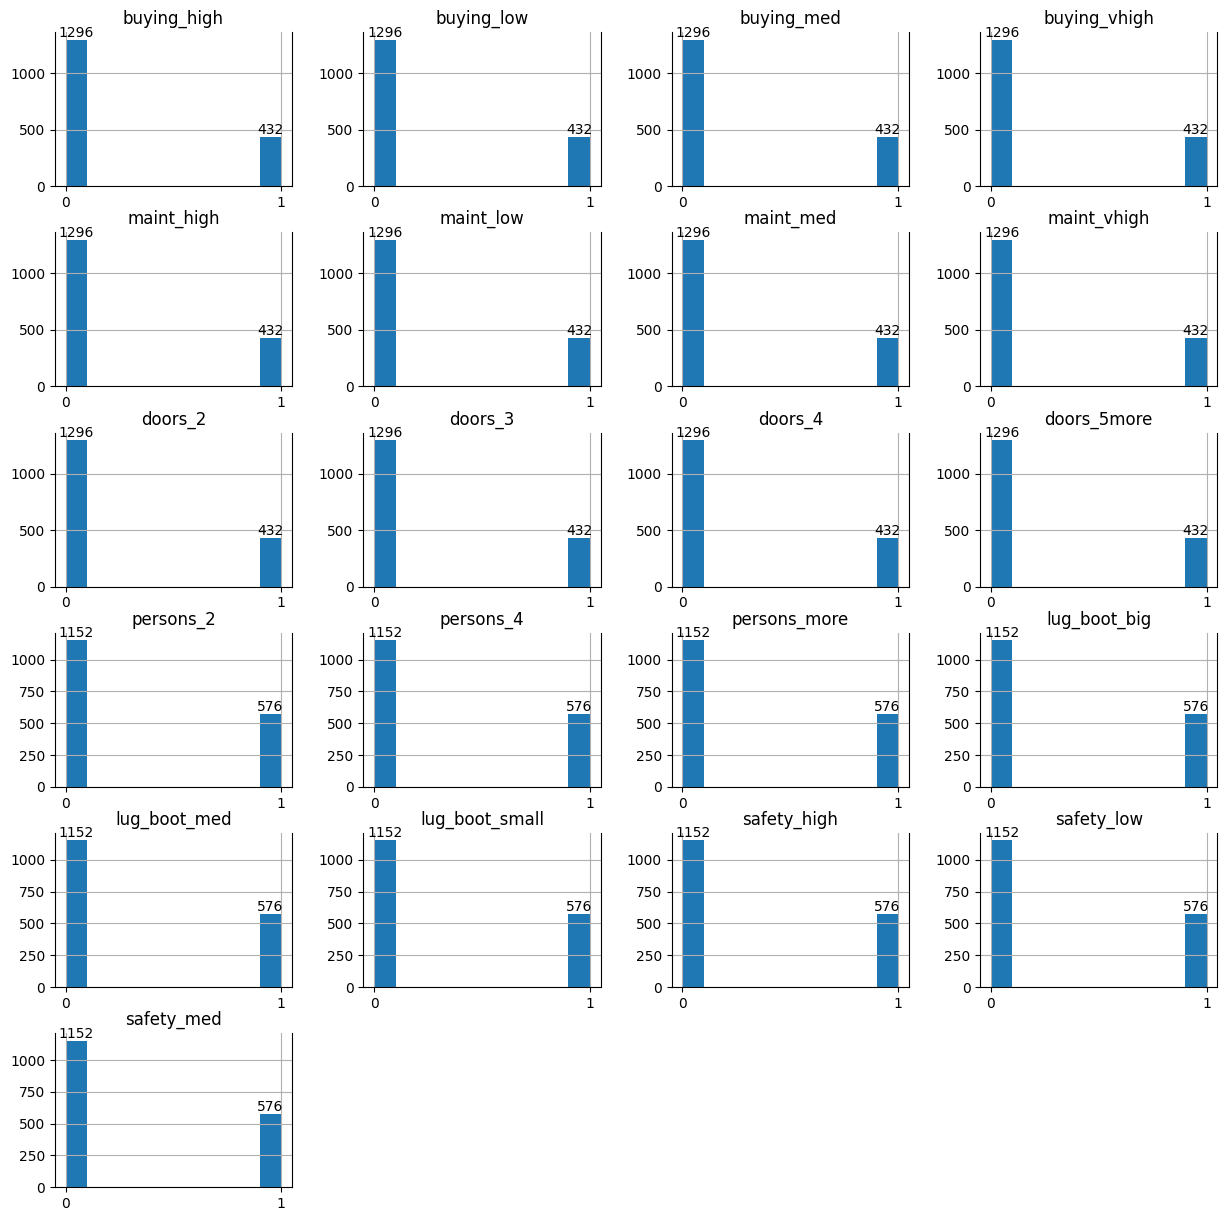

In [244]:
data_encoded_int = data_encoded.drop(["class"], axis=1).astype(int)
hist = data_encoded_int.hist(figsize=(15, 15), layout=(6, 4))

# Iterar sobre los histogramas y añadir etiquetas de datos
for ax in hist.flatten():
    for rect in ax.patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        if y > 0:
            ax.text(x, y, f'{int(y)}', ha='center', va='bottom')
    # Eliminar el borde superior del cuadro que enmarca cada histograma
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 1])
plt.show()

### Resumen_2
Al analizar el resultado de describe y observar los histogramas, se destaca que para cada característica, las categorías están uniformemente distribuidas. Esto implica que todas las categorías tienen la misma frecuencia en cada variable, lo que sugiere una distribución equilibrada de los datos en el conjunto

## Generación de base de entrenamiento y testeo 

Teniendo la variable "class" es la variable objetivo, los datos se dividen en características (X) y etiquetas (y), seguido de un proceso de escalado. Posteriormente, se lleva a cabo la separación de los datos en conjuntos de entrenamiento y prueba para su posterior análisis

In [245]:
y = data_encoded['class']
X = data_encoded.drop('class', axis=1)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

In [247]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

### Regresión Logística
La creación del modelo es seguida por una comparación entre la porción de entrenamiento y prueba. Se calculan estadísticas, se genera una matriz de confusión y se representa la curva ROC.

In [248]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [249]:
y_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)
print(classification_report(y_test, y_pred))

Accuracy: 0.9210019267822736
              precision    recall  f1-score   support

         acc       0.79      0.86      0.82       111
        good       0.83      0.45      0.59        22
       unacc       0.96      0.97      0.97       368
       vgood       1.00      0.89      0.94        18

    accuracy                           0.92       519
   macro avg       0.90      0.79      0.83       519
weighted avg       0.92      0.92      0.92       519



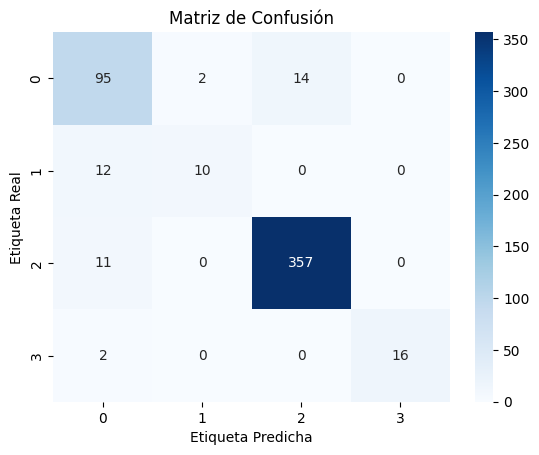

In [250]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [251]:
lb = LabelBinarizer()

y_test_binary = lb.fit_transform(y_test)

y_probs = logistic_model.predict_proba(X_test)

roc_auc = {}
for i in range(len(y_test_binary[0])):
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_probs[:, i])

fpr = {}
tpr = {}
for i in range(len(y_test_binary[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probs[:, i])

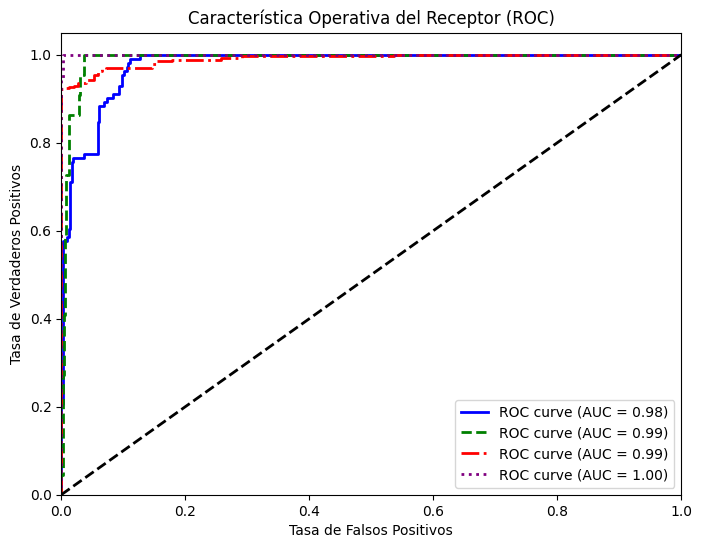

In [252]:
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=linestyles[i], lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Resumen_Regresión Logística
Se crea el modelo de regresión logística, luego se calculan las estadísticas, obteniendo una precisión (accuracy) de 0.92. Se presenta la matriz de confusión, en la que se observa una gran cantidad de datos clasificados como verdaderos positivos para todas las categorías. Por último, se muestra la curva ROC, donde se destaca un AUC de 0.99 y 0.98.

### KNeighbors Classifier
La creación del modelo es seguida por una comparación entre la porción de entrenamiento y prueba. Se calculan estadísticas, se genera una matriz de confusión y se representa la curva ROC.

In [253]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las etiquetas de cadena a valores enteros
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

knn_classifier = KNeighborsClassifier(n_neighbors=11)  
knn_classifier.fit(X_train, y_train_encoded)


KNeighborsClassifier(n_neighbors=11)

In [254]:
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Codificar las etiquetas de cadena a valores enteros
y_test_encoded = label_encoder.fit_transform(y_test)
# Calcular la precisión del modelo
accuracy_knn = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy_knn)
# Obtener el informe de clasificación
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.9229287090558767
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       111
           1       0.67      0.18      0.29        22
           2       0.97      0.99      0.98       368
           3       1.00      0.67      0.80        18

    accuracy                           0.92       519
   macro avg       0.86      0.68      0.73       519
weighted avg       0.92      0.92      0.91       519



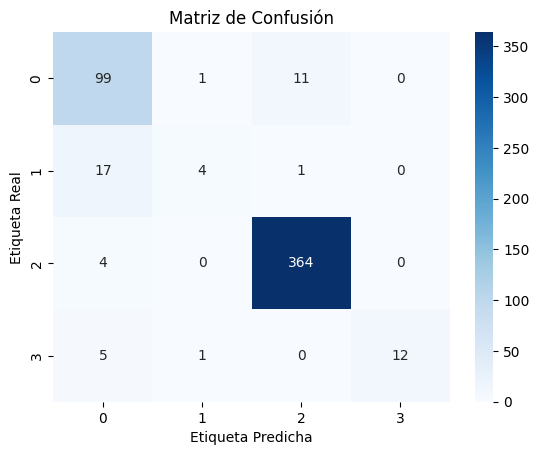

In [255]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [256]:
lb = LabelBinarizer()

y_test_binary = lb.fit_transform(y_test)

y_probs = knn_classifier.predict_proba(X_test)

roc_auc = {}
for i in range(len(y_test_binary[0])):
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_probs[:, i])

fpr = {}
tpr = {}
for i in range(len(y_test_binary[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probs[:, i])

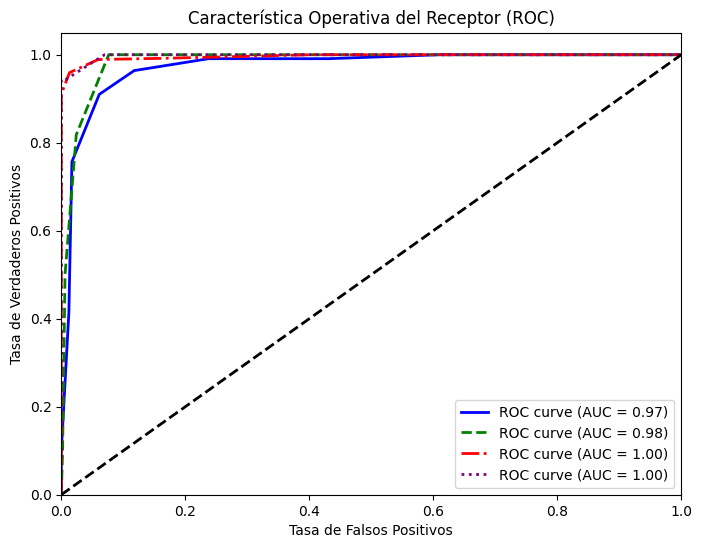

In [257]:
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=linestyles[i], lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Resumen_KNeighbors Classifier
Se crea el modelo de KNeighbors Classifier, donde se exploran diferentes valores de n_neighbors, encontrando que 11 es el mejor resultado. Tras entrenar el modelo, se calculan las estadísticas pertinentes, destacando un nivel de precisión (accuracy) de 0.92. Además, se analiza la matriz de confusión, evidenciando una alta proporción de datos clasificados correctamente como verdaderos positivos en todas las categorías. Por último, se visualiza la curva ROC, la cual presenta un área bajo la curva (AUC) que varía entre 0.97 y 1, indicando un buen rendimiento del modelo en la clasificación de las clases.

### RandomForest Classifier
La creación del modelo es seguida por una comparación entre la porción de entrenamiento y prueba. Se calculan estadísticas, se genera una matriz de confusión y se representa la curva ROC.

In [258]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [259]:
y_pred = rf_classifier.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_random_forest)
print(classification_report(y_test, y_pred))

Accuracy: 0.9421965317919075
              precision    recall  f1-score   support

         acc       0.84      0.92      0.88       111
        good       0.86      0.55      0.67        22
       unacc       0.98      0.97      0.98       368
       vgood       0.94      0.94      0.94        18

    accuracy                           0.94       519
   macro avg       0.90      0.85      0.87       519
weighted avg       0.94      0.94      0.94       519



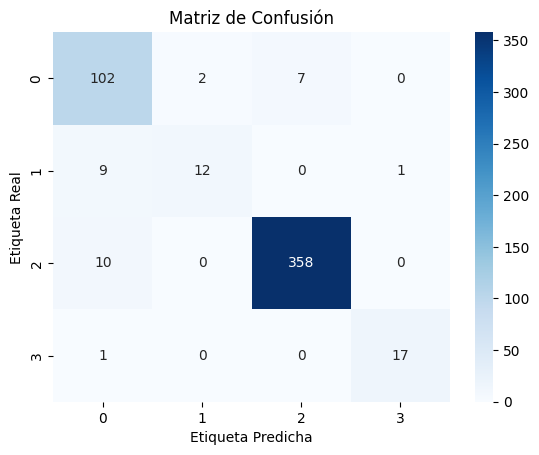

In [260]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [261]:
lb = LabelBinarizer()

y_test_binary = lb.fit_transform(y_test)

y_probs = rf_classifier.predict_proba(X_test)

roc_auc = {}
for i in range(len(y_test_binary[0])):
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_probs[:, i])

fpr = {}
tpr = {}
for i in range(len(y_test_binary[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probs[:, i])

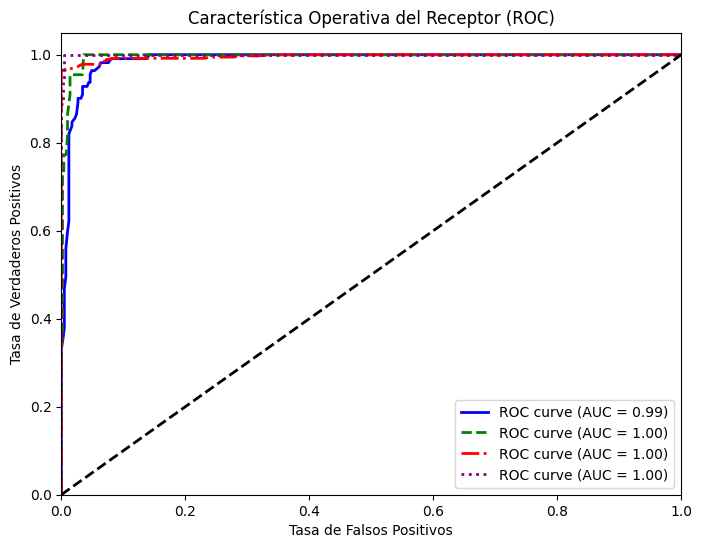

In [262]:
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=linestyles[i], lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Resumen_RandomForest Classifier
Se crea el modelo de RandomForest Classifier, luego se calculan las estadísticas, obteniendo una precisión (accuracy) de 0.95. Se presenta la matriz de confusión, en la que se observa una gran cantidad de datos clasificados como verdaderos positivos para todas las categorías. Por último, se muestra la curva ROC, donde se destaca un AUC de 0.99 y 1.

### XGBoost Classifier
Inicialemente se debe Codificar las etiquetas de cadena a valores enteros para la creación del modelo, luego se realiza una comparación entre la porción de entrenamiento y prueba. Se calculan estadísticas, se genera una matriz de confusión y se representa la curva ROC.

In [263]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las etiquetas de cadena a valores enteros
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicializar el clasificador
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [264]:
y_pred = xgb_classifier.predict(X_test)
accuracy_XGBoost = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy_XGBoost)
# Obtener el informe de clasificación
print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.9788053949903661
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       111
           1       0.89      0.77      0.83        22
           2       1.00      0.99      0.99       368
           3       1.00      1.00      1.00        18

    accuracy                           0.98       519
   macro avg       0.95      0.94      0.94       519
weighted avg       0.98      0.98      0.98       519



In [265]:
lb = LabelBinarizer()

y_test_binary = lb.fit_transform(y_test)

y_probs = xgb_classifier.predict_proba(X_test)

roc_auc = {}
for i in range(len(y_test_binary[0])):
    roc_auc[i] = roc_auc_score(y_test_binary[:, i], y_probs[:, i])

fpr = {}
tpr = {}
for i in range(len(y_test_binary[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probs[:, i])

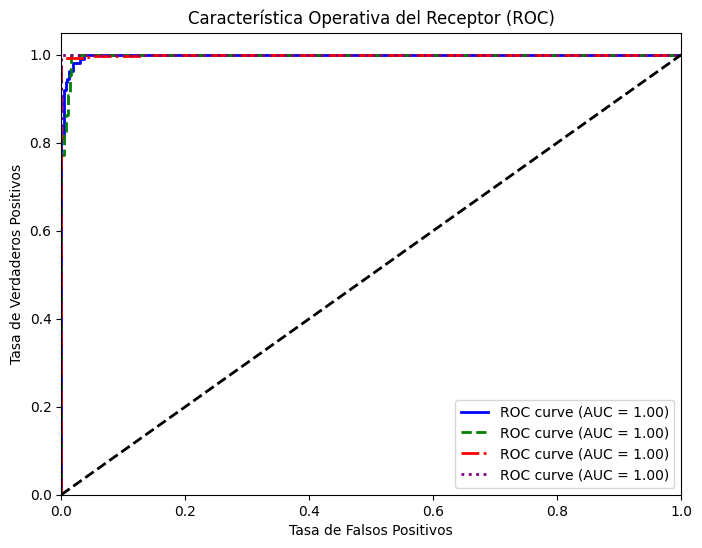

In [266]:
colors = ['blue', 'green', 'red', 'purple']
linestyles = ['-', '--', '-.', ':']

plt.figure(figsize=(8, 6))
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i], linestyle=linestyles[i], lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Resumen_XGBoost Classifier
Se crea el modelo de XGBoost Classifier, luego se calculan las estadísticas, obteniendo una precisión (accuracy) de 0.98. Se presenta la matriz de confusión, en la que se observa una gran cantidad de datos clasificados como verdaderos positivos para todas las categorías. Por último, se muestra la curva ROC, donde se destaca un AUC Muy cercano a 1.

## Comparacion de Modelos

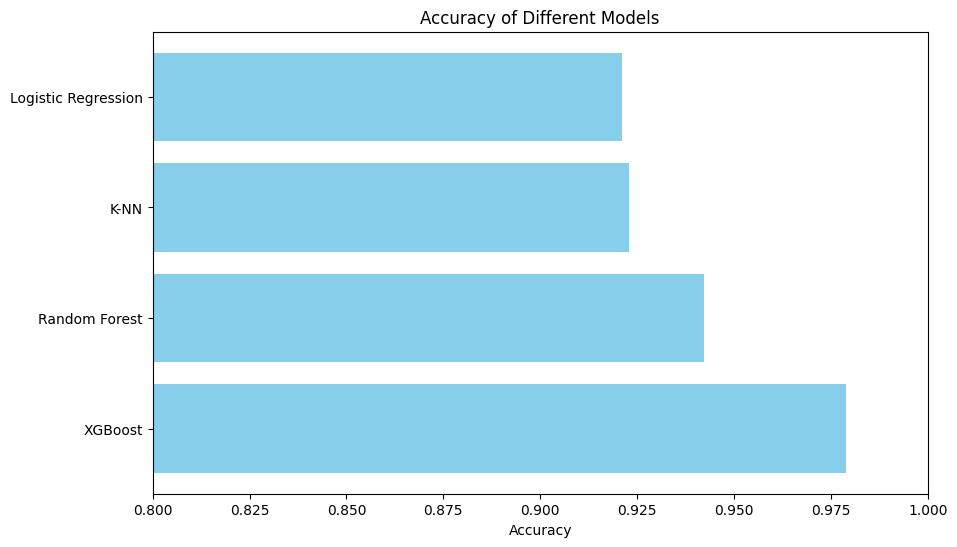

In [267]:
# Precisión de los 4 modelos
accuracies = [accuracy_logistic, accuracy_knn, accuracy_random_forest, accuracy_XGBoost ]

# Nombres de los modelos
models = ['Logistic Regression',  'K-NN' , 'Random Forest','XGBoost' ]

# Graficar las precisión de los modelos
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0.8, 1.0)  # Ajustar los límites del eje x para una mejor visualización
plt.gca().invert_yaxis()  # Invertir el eje y para que los modelos aparezcan en orden descendente
plt.show()

## *Conclusión*

Después de comparar los datos estadísticos de cada clase en cada modelo, así como los valores de accurancy y las curvas ROC-AUC, encontramos que el orden de rendimiento de los modelos fue el siguiente: Logistic Regression con un accuracy de 0.921, K-Nearest Neighbors con 0.923, Random Forest con 0.94 y XGBoost con 0.97. Todos los modelos fueron entrenados exhaustivamente hasta alcanzar estos resultados. Es importante destacar que el modelo XGBoost no fue explorado durante la clase, sino que fue seleccionado de las sugerencias proporcionadas en la página donde se obtuvo el conjunto de datos original (https://archive.ics.uci.edu/dataset/19/car+evaluation). Basándonos en estos resultados, podemos concluir que XGBoost ofrece el mejor desempeño, siendo el modelo preferido debido a su destacado rendimiento en términos de accurancy y curvas ROC-AUC.